# 필터의 가중치

- 입력 이미지의 2차원 영역에 적용되어 어떤 특징을 크게 두드러지게 표현하는 역할
  - 예) 물건의 테두리같은 특징적인 부분의 가중치는 높고 그 외 영역은 가중치가 낮게

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
# 저장해둔 cnn모델 불러오기
model = keras.models.load_model("./model/best-cnn-model.keras")

In [3]:
# 모델 층 확인
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [4]:
# 첫 번쨰 합성곱 층의 가중치 확인
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


- conv.weights[0]
  - 가중치
  - 가중치의 크기
    - 커널의 개수 : (3, 3, 1)
    - 필터의 개수 : 32

- conv.weights[1]
  - 절편의 개수 = 필터의 개수

In [5]:
# 원활한 계산을 위해 넘파이 배열로 변환
conv_weights = conv.weights[0].numpy()

In [6]:
conv_weights

array([[[[ 3.37453485e-01,  1.66899502e-01, -1.48162797e-01,
          -7.72116855e-02, -4.46355864e-02, -1.39174774e-01,
           1.70236602e-01,  2.75743511e-02,  1.71856239e-01,
          -1.13661468e-01, -3.31479728e-01, -8.71016607e-02,
           1.67238384e-01,  1.31049067e-01, -2.31568813e-01,
           9.01240110e-02, -3.96219827e-02, -9.96640623e-02,
           2.91413963e-01, -8.05526078e-01, -1.32516071e-01,
           8.28201547e-02, -1.81375712e-01, -5.24318628e-02,
           1.18305616e-01, -1.22833498e-01,  2.14435137e-03,
          -1.44935921e-01, -2.34745100e-01,  1.52361095e-01,
           6.85229972e-02, -1.41850993e-01]],

        [[ 2.15947279e-03, -1.62925437e-01,  1.03909068e-01,
           5.08775972e-02, -5.30643463e-02,  8.15043077e-02,
           2.68311590e-01,  4.80407029e-02, -2.42429882e-01,
           6.87291846e-02,  1.18266113e-01, -5.99573612e-01,
           7.35288411e-02, -4.43820134e-02,  4.27044719e-01,
           2.74119884e-01,  1.60198301

In [7]:
print(conv_weights.mean(), conv_weights.std())

-0.029481577 0.21500847


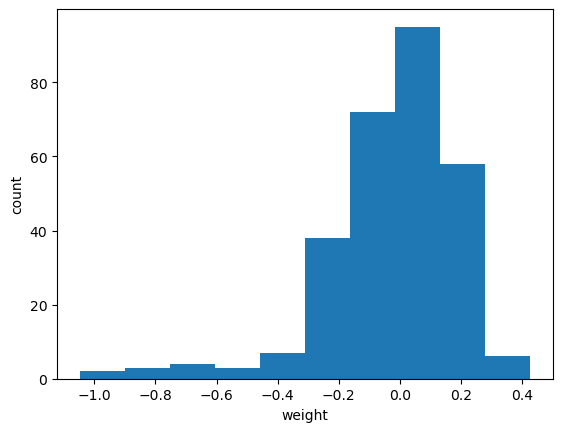

In [8]:
# 가중치 히스토그램
plt.figure()
plt.hist(conv_weights.reshape(-1, 1)) # hist함수는 데이터를 1차원 배열로 전달해야함
plt.xlabel("weight")
plt.ylabel("count")
plt.show()

- 0을 중심으로 종 모양의 분포

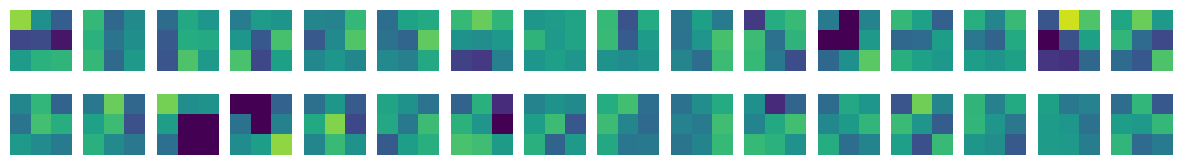

In [10]:
# 32개의 커널을 모두 시각화
fig, axs = plt.subplots(2, 16, figsize = (15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16+j], vmin = -0.5, vmax = 0.5)
        axs[i, j].axis("off")
plt.show()

- 밝은 부분이 높은 값
  - 가중치가 높은 영역에 이미지가 겹치면 크게 활성화 됨
    - 예) 오른쪽 세로로 한 줄의 가중치가 높다면 오른쪽에 놓인 직선을 만나면 크게 활성화

- i : 행 인덱스(0 ~ 1)
- j : 열 인덱스(0 ~ 15)

- imshow()
  - 배열의 최댓값과 최솟값으로 픽셀의 강도를 표현
    - 배열의 최댓값은 가장 밝은 색으로
    - 배열의 최솟값은 가장 어두운 색으로 표현

    - vmin, vmax
      - 컬러맵으로 표현할 색의 범위 지정